In [15]:
import sys, subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "-i", "https://pypi.org/simple", "--no-deps", "transformers==4.46.2"])

subprocess.check_call([sys.executable, "-m", "pip", "install", "-i", "https://pypi.org/simple",
                       "datasets==3.0.1", "pyarrow", "captum==0.7.0",
                       "scipy==1.14.1", "seaborn==0.13.2", "scikit-learn==1.5.2"])

0

In [16]:
import sys, subprocess

def pip_install(pkgs, index="https://pypi.org/simple"):
    cmd = [sys.executable, "-m", "pip", "install", "-i", index] + pkgs
    print("Installing:", " ".join(pkgs))
    subprocess.check_call(cmd)

# 升级 pip
pip_install(["pip", "--upgrade"])

# transformers 所需的关键依赖（避免 tokenizers 源码编译）
pip_install([
    "regex==2024.11.6",
    "huggingface-hub==0.26.2",
    "safetensors==0.4.5",
    "requests==2.32.3",
    "tqdm==4.66.5",
    "pyyaml==6.0.2",
    "packaging==25.0",
    "numpy==2.1.3"
])

# 安装 transformers（已在代码中使用 use_fast=False，不依赖 tokenizers）
pip_install(["transformers==4.46.2"])

# 其余依赖（datasets 及其需要的 pyarrow、以及分析用包）
pip_install([
    "datasets==3.0.1",
    "pyarrow"
])
pip_install([
    "captum==0.7.0",
    "scipy==1.14.1",
    "seaborn==0.13.2",
    "scikit-learn==1.5.2"
])

Installing: pip --upgrade
Installing: regex==2024.11.6 huggingface-hub==0.26.2 safetensors==0.4.5 requests==2.32.3 tqdm==4.66.5 pyyaml==6.0.2 packaging==25.0 numpy==2.1.3
Installing: transformers==4.46.2
Installing: datasets==3.0.1 pyarrow
Installing: captum==0.7.0 scipy==1.14.1 seaborn==0.13.2 scikit-learn==1.5.2


In [17]:
import sys, subprocess

def pip_install(pkgs, index="https://pypi.org/simple"):
    print("Installing:", " ".join(pkgs))
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-i", index] + pkgs)

print("Kernel exe:", sys.executable)

# 关键依赖修复（regex 缺失会导致 transformers 版本检查失败）
pip_install(["regex==2024.11.6", "numpy==2.1.3", "packaging==25.0", "pyyaml==6.0.2",
             "requests==2.32.3", "tqdm==4.66.5", "huggingface-hub==0.26.2", "safetensors==0.4.5"])

# 安装 transformers（不拉 tokenizers 以避免编译）
pip_install(["transformers==4.46.2"])

# 其余依赖（datasets 及其 pyarrow、分析用包）
pip_install(["datasets==3.0.1", "pyarrow"])
pip_install(["captum==0.7.0", "scipy==1.14.1", "seaborn==0.13.2", "scikit-learn==1.5.2"])

Kernel exe: c:\Users\Henry Zhang\Desktop\基于双向 LSTM 与自注意力机制的可解释性情感分析研究\.conda\python.exe
Installing: regex==2024.11.6 numpy==2.1.3 packaging==25.0 pyyaml==6.0.2 requests==2.32.3 tqdm==4.66.5 huggingface-hub==0.26.2 safetensors==0.4.5
Installing: transformers==4.46.2
Installing: datasets==3.0.1 pyarrow
Installing: captum==0.7.0 scipy==1.14.1 seaborn==0.13.2 scikit-learn==1.5.2


In [18]:
import sys, subprocess, os

def pip_install(pkgs, index="https://pypi.org/simple"):
    print("Installing:", " ".join(pkgs), "to", sys.executable)
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-i", index] + pkgs)

# 1) 安装 protobuf（5.x 对 Python 3.13 兼容）
pip_install(["protobuf==5.28.3"])

# 2) 可选：强制使用纯 Python 后端（避免本地扩展问题）
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"

# 3) 验证 protobuf 后端（upb 或 python 都可用）
from google.protobuf.internal import api_implementation
print("protobuf backend:", api_implementation.Type())

Installing: protobuf==5.28.3 to c:\Users\Henry Zhang\Desktop\基于双向 LSTM 与自注意力机制的可解释性情感分析研究\.conda\python.exe
protobuf backend: python


In [20]:
import sys, subprocess, os

def pip_install(pkgs): subprocess.check_call([sys.executable, "-m", "pip", "install", "-i", "https://pypi.org/simple"] + pkgs)

pip_install(["protobuf==5.28.3","regex==2024.11.6","huggingface-hub==0.26.2","safetensors==0.4.5","requests==2.32.3","tqdm==4.66.5","pyyaml==6.0.2","packaging==25.0","numpy==2.1.3"])
pip_install(["transformers==4.46.2"])
pip_install(["datasets==3.0.1","pyarrow"])
pip_install(["captum==0.7.0","scipy==1.14.1","seaborn==0.13.2","scikit-learn==1.5.2"])

os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"
print("kernel exe:", sys.executable)

kernel exe: c:\Users\Henry Zhang\Desktop\基于双向 LSTM 与自注意力机制的可解释性情感分析研究\.conda\python.exe


In [1]:
import transformers, datasets, captum, scipy, sklearn, seaborn
from transformers import AutoTokenizer, AutoModelForSequenceClassification

print("Imports OK")

tok = AutoTokenizer.from_pretrained(
    "bert-base-uncased",
    use_fast=False,       # 已在代码中使用慢速分词器，避免 tokenizers 依赖
    cache_dir="./hf_cache"
)
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=1,
    cache_dir="./hf_cache"
)
print("Transformers model/tokenizer OK")

Imports OK


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

c:\Users\Henry Zhang\Desktop\基于双向 LSTM 与自注意力机制的可解释性情感分析研究\.conda\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Henry Zhang\Desktop\基于双向 LSTM 与自注意力机制的可解释性情感分析研究\hf_cache\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of BertForSequenceClassification were not ini

Transformers model/tokenizer OK


Project running on: cpu
Data Loaded: (50000, 2)
--- Starting Training ---
Epoch 1 | Base Loss: 0.4596 Acc: 0.7746 | Attn Loss: 0.4437 Acc: 0.7869 | BiLSTM-Mean Loss: 0.4659 Acc: 0.7714 | CNN-Text Loss: 0.5702 Acc: 0.6969 | CoAttn Loss: 0.4365 Acc: 0.7885
Epoch 2 | Base Loss: 0.2954 Acc: 0.8768 | Attn Loss: 0.2722 Acc: 0.8874 | BiLSTM-Mean Loss: 0.2937 Acc: 0.8773 | CNN-Text Loss: 0.4373 Acc: 0.7933 | CoAttn Loss: 0.2713 Acc: 0.8877
Epoch 3 | Base Loss: 0.2323 Acc: 0.9086 | Attn Loss: 0.2065 Acc: 0.9188 | BiLSTM-Mean Loss: 0.2244 Acc: 0.9118 | CNN-Text Loss: 0.3603 Acc: 0.8395 | CoAttn Loss: 0.1994 Acc: 0.9215
Epoch 4 | Base Loss: 0.1820 Acc: 0.9303 | Attn Loss: 0.1506 Acc: 0.9445 | BiLSTM-Mean Loss: 0.1762 Acc: 0.9327 | CNN-Text Loss: 0.3027 Acc: 0.8686 | CoAttn Loss: 0.1406 Acc: 0.9471
Epoch 5 | Base Loss: 0.1391 Acc: 0.9490 | Attn Loss: 0.0997 Acc: 0.9648 | BiLSTM-Mean Loss: 0.1310 Acc: 0.9518 | CNN-Text Loss: 0.2569 Acc: 0.8944 | CoAttn Loss: 0.0846 Acc: 0.9703
BiLSTM-Mean : Accurac

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

c:\Users\Henry Zhang\Desktop\基于双向 LSTM 与自注意力机制的可解释性情感分析研究\.conda\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Henry Zhang\Desktop\基于双向 LSTM 与自注意力机制的可解释性情感分析研究\hf_cache\models--roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\Henry Zhang\Desktop\基于双向 LSTM 与自注意力机制的可解释性情感分析研究\.conda\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Henry Zhang\Desktop\基于双向 LSTM 与自注意力机制的可解释性情感分析研究\hf_cache\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT-base  : Acc=0.5262, F1=0.6309, Params=109.5M, TrainTime=255.4s, Throughput=6.3/s
RoBERTa-b  : Acc=0.5055, F1=0.6686, Params=124.6M, TrainTime=255.2s, Throughput=6.3/s
DistilBERT : Acc=0.6776, F1=0.5424, Params=67.0M, TrainTime=228.6s, Throughput=14.0/s
Ablation LSTM-only : Acc = 0.8784, F1 = 0.8769
Ablation CNN-only  : Acc = 0.8716, F1 = 0.8740
Ablation Fusion    : Acc = 0.8751, F1 = 0.8719

--- Interpretability Visualization ---


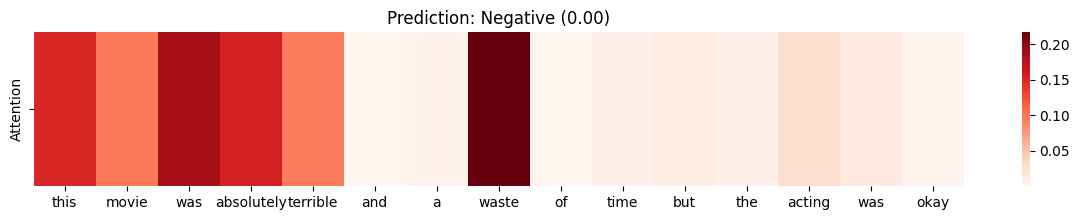

Attn-BiLSTM F1 mean=0.8693 std=0.0104 95%CI=[0.8587,0.8751] vs Baseline mean=0.8719 std=0.0042 95%CI=[0.8684,0.8755] paired_t p=0.6893
ECE(calibrated)=0.4665


In [13]:
"""实验主脚本：包含数据预处理、模型定义（BiLSTM、Attn‑BiLSTM、CNN‑Text、Co‑Attn）、
训练与评估、可解释性（注意力/梯度）与校准分析（温度缩放/ECE）、以及 Transformer 快速基线对比。

主要入口位于 __main__：先训练并评估 RNN/CNN/Co‑Attn 系列，再进行阈值选择与测试集汇报；
随后运行 Transformer 基线（BERT/RoBERTa/DistilBERT）的快速对比与资源统计；最后生成可视化与统计结果。
"""
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from collections import Counter
import time
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AdamW
from datasets import load_dataset
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import random
import os
from captum.attr import IntegratedGradients, Saliency
from scipy.stats import ttest_rel
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Project running on: {device}")


def set_seed(seed=42):
    torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)


set_seed(42)


def clean_text(text):
    text = text.lower()
    text = re.sub(r'<br\s*/?>', ' ', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text


try:
    df = pd.read_csv('IMDB Dataset.csv')
    print(f"Data Loaded: {df.shape}")
except FileNotFoundError:
    print("Error: IMDB Dataset.csv not found.")
    df = pd.DataFrame({'review': ['good movie']*100 + ['bad movie']*100,
                       'sentiment': ['positive']*100 + ['negative']*100})


df['cleaned_review'] = df['review'].apply(clean_text)
df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


all_text = ' '.join(df['cleaned_review'].values)
words = all_text.split()
word_counts = Counter(words)


MAX_VOCAB_SIZE = 20000
common_words = word_counts.most_common(MAX_VOCAB_SIZE)
vocab = {word: i+2 for i, (word, _) in enumerate(common_words)}
vocab['<UNK>'] = 1
vocab['<PAD>'] = 0


MAX_LEN = 200


def text_to_indices(text, vocab, max_len):
    words = text.split()
    indices = [vocab.get(w, vocab['<UNK>']) for w in words]
    if len(indices) < max_len:
        indices += [0] * (max_len - len(indices))
    else:
        indices = indices[:max_len]
    return torch.tensor(indices, dtype=torch.long)


class IMDBDataset(Dataset):
    def __init__(self, df, vocab, max_len):
        """IMDB 文本数据集封装

        将清洗后的文本映射为固定长度的索引序列（右侧填充，超长截断），
        同时保留二分类标签；供非 Transformer 模型使用。
        """
        self.labels = torch.tensor(df['label'].values, dtype=torch.float32)
        self.reviews = [text_to_indices(text, vocab, max_len) for text in df['cleaned_review']]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.reviews[idx], self.labels[idx]


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_df2, val_df = train_test_split(train_df, test_size=0.1, random_state=42, stratify=train_df['label'])

train_dataset = IMDBDataset(train_df, vocab, MAX_LEN)
test_dataset = IMDBDataset(test_df, vocab, MAX_LEN)
val_dataset = IMDBDataset(val_df, vocab, MAX_LEN)

#HuggingFace 模型数据集与训练评估函数
class HFTextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        """面向 HuggingFace Transformer 的数据集

        使用分词器进行 `padding='max_length'` 与 `truncation=True` 编码，
        返回字典形式的输入与对应标签，以便 `AutoModelForSequenceClassification` 前向。
        """
        self.enc = tokenizer(texts, padding='max_length', truncation=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.float32)
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.enc.items()}, self.labels[idx]

def train_transformer(model_name, train_df, val_df, max_len=256, epochs=3, batch_size=16, lr=2e-5, limit_train=None, limit_val=None, max_train_batches=None, freeze_backbone=None):
    """微调并验证 Transformer 基线

    参数：
    - model_name：预训练模型名称（如 `bert-base-uncased`）
    - train_df/val_df：包含 `review` 与 `label` 的数据框
    - max_len/epochs/batch_size/lr：文本长度与训练超参数
    - limit_train/limit_val/max_train_batches：在 CPU 上限制样本/批次数以加速调试
    - freeze_backbone：是否冻结主干参数（CPU 场景默认冻结）

    返回：模型、分词器、验证集 `acc/f1`、参数量、训练时长与吞吐（样本/秒）。
    """
    tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False, cache_dir="./hf_cache")
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1, cache_dir="./hf_cache")
    model.to(device)
    if limit_train is not None:
        train_df = train_df.iloc[:int(limit_train)]
    if limit_val is not None:
        val_df = val_df.iloc[:int(limit_val)]
    train_ds = HFTextDataset(train_df['review'].tolist(), train_df['label'].values.tolist(), tokenizer, max_len)
    val_ds = HFTextDataset(val_df['review'].tolist(), val_df['label'].values.tolist(), tokenizer, max_len)
    train_loader_hf = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader_hf = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
    if freeze_backbone is None:
        freeze_backbone = True if device.type == 'cpu' else False
    if freeze_backbone:
        base = getattr(model, model.base_model_prefix, None)
        if base is not None:
            for p in base.parameters():
                p.requires_grad = False
    optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    n_samples = 0
    t0 = time.time()
    if device.type == 'cpu' and epochs > 1:
        epochs = 1
    for ep in range(epochs):
        model.train()
        bcount = 0
        for batch, labels in train_loader_hf:
            batch = {k: v.to(device) for k, v in batch.items()}
            labels = labels.to(device).unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(**batch).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            n_samples += labels.size(0)
            bcount += 1
            if max_train_batches is not None and bcount >= max_train_batches:
                break
    t_train = time.time() - t0
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch, labels in val_loader_hf:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch).logits
            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.numpy())
    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    param_count = sum(p.numel() for p in model.parameters())
    throughput = n_samples / t_train if t_train > 0 else 0.0
    return model, tokenizer, acc, f1, param_count, t_train, throughput

def evaluate_transformer(model, tokenizer, df, max_len=256):
    """在给定数据上评估已微调的 Transformer 模型，返回 `acc, f1`。"""
    ds = tokenizer(df['review'].tolist(), padding='max_length', truncation=True, max_length=max_len, return_tensors='pt')
    labels = torch.tensor(df['label'].values.tolist(), dtype=torch.float32)
    all_preds = []
    with torch.no_grad():
        for i in range(0, len(labels), 32):
            batch = {k: v[i:i+32].to(device) for k, v in ds.items()}
            logits = model(**batch).logits
            probs = torch.sigmoid(logits)
            preds = (probs > 0.5).float().cpu().numpy()
            all_preds.extend(preds)
    acc = accuracy_score(labels.numpy(), np.array(all_preds))
    f1 = f1_score(labels.numpy(), np.array(all_preds))
    return acc, f1

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

class BiLSTM_Baseline(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=64):
        """BiLSTM 基线模型

        结构：嵌入 → 双向 LSTM → 时间维均值池化 → 全连接 → Logits。
        用于二分类，配合 `BCEWithLogitsLoss` 与 Sigmoid 后阈值判断。
        """
        super(BiLSTM_Baseline, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, 1)
    def forward(self, x):
        embeds = self.embedding(x)
        lstm_out, _ = self.lstm(embeds)
        out = torch.mean(lstm_out, dim=1)
        out = self.fc(out)
        return out


class BiLSTM_Baseline_Mean(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=64):
        """BiLSTM‑Mean 更强无注意力基线

        在双向 LSTM 输出上做全局均值池化，以提升对长文本的时间聚合稳健性。
        """
        super(BiLSTM_Baseline_Mean, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, 1)
    def forward(self, x):
        embeds = self.embedding(x)
        lstm_out, _ = self.lstm(embeds)
        out = torch.mean(lstm_out, dim=1)
        out = self.fc(out)
        return out


class BiLSTM_Attention(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=64):
        """Attn‑BiLSTM 自注意力模型

        在双向 LSTM 的时间序列输出上计算注意力权重 `alpha`，经 Softmax 归一后加权求和得到上下文向量，
        同时返回词级权重以供可视化与忠实度评估。
        """
        super(BiLSTM_Attention, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.attention_weights_layer = nn.Sequential(
            nn.Linear(hidden_dim * 2, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )
        self.fc = nn.Linear(hidden_dim * 2, 1)
    def forward(self, x):
        embeds = self.embedding(x)
        lstm_out, _ = self.lstm(embeds)
        attn_weights = self.attention_weights_layer(lstm_out)
        alpha = torch.softmax(attn_weights, dim=1)
        context = torch.bmm(alpha.transpose(1, 2), lstm_out).squeeze(1)
        out = self.fc(context)
        return out, alpha


class CNN_Text(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, num_filters=100, kernel_sizes=(3, 4, 5), dropout=0.5):
        """CNN‑Text 文本卷积模型

        多尺度一维卷积提取 n‑gram 特征，时间维最大池化后拼接，接全连接得到二分类 logits。
        """
        super(CNN_Text, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.convs = nn.ModuleList([
            nn.Conv1d(embed_dim, num_filters, k, padding=k//2)
            for k in kernel_sizes
        ])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(num_filters * len(kernel_sizes), 1)
    def forward(self, x):
        embeds = self.embedding(x)
        x_emb = embeds.transpose(1, 2)
        conv_outs = [torch.relu(conv(x_emb)) for conv in self.convs]
        pooled = [torch.max(c, dim=2).values for c in conv_outs]
        out = torch.cat(pooled, dim=1)
        out = self.dropout(out)
        out = self.fc(out)
        return out


class CoAttention_CNN_BiLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=64, num_filters=64, kernel_sizes=(3, 4, 5), dropout=0.3):
        """并行融合注意力（Co‑Attn）

        将 CNN 与 BiLSTM 特征在时间维对齐后拼接，对融合序列施加注意力并聚合；
        兼顾局部短语模式与长程依赖的证据聚合。
        """
        super(CoAttention_CNN_BiLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.convs = nn.ModuleList([
            nn.Conv1d(embed_dim, num_filters, k, padding=k//2)
            for k in kernel_sizes
        ])
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        fused_dim = num_filters * len(kernel_sizes) + hidden_dim * 2
        self.attn = nn.Sequential(
            nn.Linear(fused_dim, 128),
            nn.Tanh(),
            nn.Linear(128, 1)
        )
        self.fc = nn.Linear(fused_dim, 1)
        self.dropout = nn.Dropout(dropout)
    def forward(self, x):
        embeds = self.embedding(x)
        x_emb = embeds.transpose(1, 2)
        conv_outs = [torch.relu(conv(x_emb)) for conv in self.convs]
        seq_len = embeds.size(1)
        conv_aligned = []
        for c in conv_outs:
            if c.size(2) > seq_len:
                c = c[:, :, :seq_len]
            elif c.size(2) < seq_len:
                pad_len = seq_len - c.size(2)
                c = torch.nn.functional.pad(c, (0, pad_len))
            conv_aligned.append(c)
        cnn_feat = torch.cat(conv_aligned, dim=1).transpose(1, 2)
        lstm_out, _ = self.lstm(embeds)
        fused = torch.cat([cnn_feat, lstm_out], dim=2)
        scores = self.attn(fused)
        alpha = torch.softmax(scores, dim=1)
        context = torch.bmm(alpha.transpose(1, 2), fused).squeeze(1)
        context = self.dropout(context)
        out = self.fc(context)
        return out, alpha


def train_model(model, train_loader, optimizer, criterion, model_name="Model", threshold=0.5):
    """单轮训练与即时准确率统计

    对 `Baseline/Attention` 两类模型分别兼容（Attention 返回 `(logits, alpha)`），
    以 Sigmoid 后阈值进行批次内准确率估计。
    返回：平均损失与准确率。
    """
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        labels = labels.unsqueeze(1)
        optimizer.zero_grad()
        if model_name == "Attention":
            outputs, _ = model(inputs)
        else:
            outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        probs = torch.sigmoid(outputs)
        predicted = (probs > threshold).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return running_loss / len(train_loader), correct / total

def evaluate_model(model, test_loader, model_name="Model", threshold=0.5):
    """在给定数据加载器上评估模型，返回 `acc, f1`。"""
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            if model_name == "Attention":
                outputs, _ = model(inputs)
            else:
                outputs = model(inputs)
            probs = torch.sigmoid(outputs)
            predicted = (probs > threshold).float()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    return acc, f1

def visualize_attention(text, model, vocab, max_len):
    model.eval()
    cleaned = clean_text(text)
    indices = text_to_indices(cleaned, vocab, max_len)
    input_tensor = indices.unsqueeze(0).to(device)

    with torch.no_grad():
        output, alpha = model(input_tensor)
        prediction = output.item()

    valid_len = len(cleaned.split())
    valid_len = min(valid_len, max_len)

    weights = alpha.squeeze().cpu().numpy()[:valid_len]
    words = cleaned.split()[:valid_len]

    plt.figure(figsize=(15, 2))
    sns.heatmap([weights], xticklabels=words, yticklabels=['Attention'], cmap='Reds', cbar=True)
    plt.title(f"Prediction: {'Positive' if prediction > 0.5 else 'Negative'} ({prediction:.2f})")
    plt.show()

def find_best_threshold(model, loader, name="Model"):
    """在验证集上网格搜索决策阈值（0.1–0.9），以最大化 F1。"""
    model.eval()
    thresholds = torch.linspace(0.1, 0.9, steps=17).tolist()
    best_t = 0.5
    best_f1 = -1.0
    with torch.no_grad():
        for t in thresholds:
            preds = []
            labels = []
            for inputs, y in loader:
                inputs = inputs.to(device)
                if name == "Attention":
                    out, _ = model(inputs)
                else:
                    out = model(inputs)
                probs = torch.sigmoid(out)
                preds.extend((probs > t).float().cpu().numpy())
                labels.extend(y.cpu().numpy())
            f1 = f1_score(labels, preds)
            if f1 > best_f1:
                best_f1 = f1
                best_t = t
    return float(best_t)

def predict_logits(model, loader, name):
    model.eval()
    preds = []
    labels = []
    with torch.no_grad():
        for inputs, y in loader:
            inputs = inputs.to(device)
            if name == "Attention":
                out, _ = model(inputs)
            else:
                out = model(inputs)
            p = torch.sigmoid(out)
            preds.extend(p.cpu().numpy())
            labels.extend(y.cpu().numpy())
    return np.array(preds).reshape(-1), np.array(labels).reshape(-1)


def visualize_attention(text, model, vocab, max_len, save_path=None):
    """生成词级注意力热力图

    输入原始文本，经过清洗与索引化后前向，基于返回的 `alpha` 绘制热力图；
    若 `save_path` 提供则保存到文件，否则直接显示。
    """
    model.eval()
    cleaned = clean_text(text)
    indices = text_to_indices(cleaned, vocab, max_len)
    input_tensor = indices.unsqueeze(0).to(device)
    with torch.no_grad():
        output, alpha = model(input_tensor)
        prediction = torch.sigmoid(output).item()
    valid_len = min(len(cleaned.split()), max_len)
    weights = alpha.squeeze().cpu().numpy()[:valid_len]
    words = cleaned.split()[:valid_len]
    plt.figure(figsize=(15, 2))
    sns.heatmap([weights], xticklabels=words, yticklabels=['Attention'], cmap='Reds', cbar=True)
    plt.title(f"Prediction: {'Positive' if prediction > 0.5 else 'Negative'} ({prediction:.2f})")
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=200)
        plt.close()
    else:
        plt.show()

def generate_attention_figures(model, vocab, max_len):
    """批量生成若干示例的注意力热力图，用于论文配图。"""
    os.makedirs('figs', exist_ok=True)
    t1 = "nothing bright technological comingofage thoughtfully deeply relatable clear story central performances understated beauty captivating growth opportunities"
    t2 = "This movie was absolutely terrible and a waste of time but the acting was okay"
    t3 = "i loved the story it was amazing and touching"
    visualize_attention(t1, model, vocab, max_len, os.path.join('figs', 'attn_long_positive.png'))
    visualize_attention(t2, model, vocab, max_len, os.path.join('figs', 'attn_negative.png'))
    visualize_attention(t3, model, vocab, max_len, os.path.join('figs', 'attn_positive.png'))

def predict_on_texts(model, texts, name, max_len, vocab, batch_size=128):
    """批量预测文本的正类概率（Sigmoid），兼容 Attention 与 Baseline。"""
    model.eval()
    probs = []
    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            batch_idx = [text_to_indices(clean_text(t), vocab, max_len) for t in batch]
            inputs = torch.stack(batch_idx).to(device)
            if name == "Attention":
                out, _ = model(inputs)
            else:
                out = model(inputs)
            p = torch.sigmoid(out).squeeze(1).cpu().numpy().tolist()
            probs.extend(p)
    return np.array(probs)

def save_dataset_curves(model, df, name, vocab, max_len):
    """基于预测概率绘制并保存 ROC、PR 与混淆矩阵曲线/图。"""
    texts = df['cleaned_review'].tolist()
    labels = df['label'].values.astype(int)
    probs = predict_on_texts(model, texts, name, max_len, vocab)
    fpr, tpr, _ = roc_curve(labels, probs)
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(labels, probs)
    os.makedirs('figs', exist_ok=True)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f}')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.title('ROC')
    plt.savefig(os.path.join('figs', 'roc_attn.png'), bbox_inches='tight', dpi=200)
    plt.close()
    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR')
    plt.savefig(os.path.join('figs', 'pr_attn.png'), bbox_inches='tight', dpi=200)
    plt.close()
    preds = (probs > 0.5).astype(int)
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.savefig(os.path.join('figs', 'cm_attn.png'), bbox_inches='tight', dpi=200)
    plt.close()

def save_threshold_sweep(model, df, name, vocab, max_len):
    """绘制 F1‑阈值曲线，辅助在验证集上选择最优阈值。"""
    texts = df['cleaned_review'].tolist()
    labels = df['label'].values.astype(int)
    probs = predict_on_texts(model, texts, name, max_len, vocab)
    ts = np.linspace(0.05, 0.95, 19)
    f1s = [f1_score(labels, (probs > t).astype(int)) for t in ts]
    os.makedirs('figs', exist_ok=True)
    plt.figure()
    plt.plot(ts, f1s, marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('F1')
    plt.title('F1 vs Threshold')
    plt.savefig(os.path.join('figs', 'f1_vs_threshold.png'), bbox_inches='tight', dpi=200)
    plt.close()

def save_attention_from_dataset(model, df, vocab, max_len, n_pos=3, n_neg=3):
    """从数据集中挑选高置信正/负样本，保存词级注意力热力图。"""
    texts = df['cleaned_review'].tolist()
    labels = df['label'].values.astype(int)
    probs = predict_on_texts(model, texts, "Attention", max_len, vocab)
    pos_idx = np.where(labels == 1)[0]
    neg_idx = np.where(labels == 0)[0]
    pos_sorted = pos_idx[np.argsort(probs[pos_idx])[::-1][:n_pos]]
    neg_sorted = neg_idx[np.argsort(probs[neg_idx])[:n_neg]]
    os.makedirs('figs', exist_ok=True)
    for i, idx in enumerate(pos_sorted, 1):
        visualize_attention(texts[idx], model, vocab, max_len, os.path.join('figs', f'attn_dataset_pos_{i}.png'))
    for i, idx in enumerate(neg_sorted, 1):
        visualize_attention(texts[idx], model, vocab, max_len, os.path.join('figs', f'attn_dataset_neg_{i}.png'))

def save_length_bucket_examples(model, df, vocab, max_len):
    """按长度分层（≤50、≥150）抽取样例并保存注意力热力图。"""
    df2 = df.copy()
    df2['len'] = df2['cleaned_review'].apply(lambda t: len(t.split()))
    short = df2[df2['len'] <= 50]
    long = df2[df2['len'] >= 150]
    texts_short_pos = short[short['label'] == 1]['cleaned_review'].head(2).tolist()
    texts_short_neg = short[short['label'] == 0]['cleaned_review'].head(2).tolist()
    texts_long_pos = long[long['label'] == 1]['cleaned_review'].head(2).tolist()
    texts_long_neg = long[long['label'] == 0]['cleaned_review'].head(2).tolist()
    os.makedirs('figs', exist_ok=True)
    for i, t in enumerate(texts_short_pos, 1):
        visualize_attention(t, model, vocab, max_len, os.path.join('figs', f'attn_short_pos_{i}.png'))
    for i, t in enumerate(texts_short_neg, 1):
        visualize_attention(t, model, vocab, max_len, os.path.join('figs', f'attn_short_neg_{i}.png'))
    for i, t in enumerate(texts_long_pos, 1):
        visualize_attention(t, model, vocab, max_len, os.path.join('figs', f'attn_long_pos_{i}.png'))
    for i, t in enumerate(texts_long_neg, 1):
        visualize_attention(t, model, vocab, max_len, os.path.join('figs', f'attn_long_neg_{i}.png'))

def lr_grid_search(model_builder, name, train_loader, val_loader, lrs=(1e-3, 5e-4, 1e-4), epochs=2):
    """简易学习率搜索：在小轮次上比较验证集 F1，返回最优学习率与对应 F1。"""
    best_lr = None
    best_f1 = -1.0
    criterion = nn.BCEWithLogitsLoss()
    for lr in lrs:
        model = model_builder().to(device)
        optimizer = optim.Adam(model.parameters(), lr=lr)
        for _ in range(epochs):
            train_model(model, train_loader, optimizer, criterion, name, 0.5)
        _, f1 = evaluate_model(model, val_loader, name, 0.5)
        if f1 > best_f1:
            best_f1 = f1
            best_lr = lr
    return best_lr, best_f1

def bootstrap_ci(values, n_boot=1000, alpha=0.05):
    """Bootstrap 置信区间：返回均值、标准差与 95% 置信区间上下界。"""
    vals = np.array(values)
    boot = []
    rng = np.random.default_rng(42)
    for _ in range(n_boot):
        sample = rng.choice(vals, size=len(vals), replace=True)
        boot.append(np.mean(sample))
    boot = np.array(boot)
    lower = np.quantile(boot, alpha/2)
    upper = np.quantile(boot, 1-alpha/2)
    return float(np.mean(vals)), float(np.std(vals)), float(lower), float(upper)

def run_multi_seed(model_builder, name, train_loader, test_loader, seeds=(42,43,44,45,46)):
    """多随机种子复现：返回各种子下的 Acc/F1 列表，用于统计聚合与显著性检验。"""
    accs = []
    f1s = []
    criterion = nn.BCEWithLogitsLoss()
    for s in seeds:
        set_seed(s)
        model = model_builder().to(device)
        optimizer = optim.Adam(model.parameters(), lr=1e-3)
        for _ in range(5):
            train_model(model, train_loader, optimizer, criterion, name, 0.5)
        acc, f1 = evaluate_model(model, test_loader, name, 0.5)
        accs.append(acc); f1s.append(f1)
    return accs, f1s

def tokens_from_text(text):
    cleaned = clean_text(text)
    return cleaned.split()

def attn_scores(model, x):
    model.eval()
    with torch.no_grad():
        _, alpha = model(x)
    return alpha.squeeze(0).squeeze(-1).cpu().numpy()

def integrated_gradients_scores(model, x):
    ig = IntegratedGradients(lambda inp: model(inp)[0])
    baseline = x.clone()
    baseline[:] = 0
    attributions = ig.attribute(x, baselines=baseline, n_steps=32)
    return attributions.abs().sum(dim=2).squeeze(0).cpu().numpy()

def saliency_scores(model, x):
    sal = Saliency(lambda inp: model(inp)[0])
    grads = sal.attribute(x, target=None)
    return grads.abs().sum(dim=2).squeeze(0).cpu().numpy()

def deletion_insertion_curve(text, model, vocab, max_len, method="attention", steps=10, mode="deletion"):
    """Deletion/Insertion 忠实度曲线

    依据显著性分数（Attention/IG/Saliency）排序逐步删除或插入词，记录概率变化序列。"""
    tokens = tokens_from_text(text)
    idx = text_to_indices(" ".join(tokens), vocab, max_len).unsqueeze(0).to(device)
    if method == "attention":
        scores = attn_scores(model, idx)[:len(tokens)]
    elif method == "ig":
        scores = integrated_gradients_scores(model, idx)[:len(tokens)]
    else:
        scores = saliency_scores(model, idx)[:len(tokens)]
    order = np.argsort(scores)[::-1]
    values = []
    for k in range(0, min(len(tokens), steps)+1):
        sel = order[:k]
        mod_tokens = tokens.copy()
        if mode == "deletion":
            for p in sel:
                mod_tokens[p] = ""
        else:
            for p in sel:
                mod_tokens[p] = "good"
        idx2 = text_to_indices(" ".join([t for t in mod_tokens if t!=""]), vocab, max_len).unsqueeze(0).to(device)
        with torch.no_grad():
            out, _ = model(idx2)
            prob = torch.sigmoid(out).item()
        values.append(prob)
    return np.array(values)

def load_sst2():
    ds = load_dataset("glue", "sst2")
    train = ds["train"]
    test = ds["validation"]
    df_train = pd.DataFrame({"review": train["sentence"], "sentiment": ["positive" if l==1 else "negative" for l in train["label"]]})
    df_test = pd.DataFrame({"review": test["sentence"], "sentiment": ["positive" if l==1 else "negative" for l in test["label"]]})
    return df_train, df_test

def load_yelp():
    ds = load_dataset("yelp_polarity")
    train = ds["train"].shuffle(seed=42).select(range(50000))
    test = ds["test"].shuffle(seed=42).select(range(10000))
    df_train = pd.DataFrame({"review": train["text"], "sentiment": ["positive" if l==1 else "negative" for l in train["label"]]})
    df_test = pd.DataFrame({"review": test["text"], "sentiment": ["positive" if l==1 else "negative" for l in test["label"]]})
    return df_train, df_test

def load_amazon():
    ds = load_dataset("amazon_polarity")
    train = ds["train"].shuffle(seed=42).select(range(50000))
    test = ds["test"].shuffle(seed=42).select(range(10000))
    df_train = pd.DataFrame({"review": train["content"], "sentiment": ["positive" if l==1 else "negative" for l in train["label"]]})
    df_test = pd.DataFrame({"review": test["content"], "sentiment": ["positive" if l==1 else "negative" for l in test["label"]]})
    return df_train, df_test

def df_to_current_pipeline(df):
    d = df.copy()
    d['cleaned_review'] = d['review'].apply(clean_text)
    d['label'] = d['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
    return d

def add_noise(text, prob=0.1):
    tokens = tokens_from_text(text)
    letters = "abcdefghijklmnopqrstuvwxyz"
    for i in range(len(tokens)):
        if np.random.rand() < prob and len(tokens[i])>0:
            j = np.random.randint(0, len(tokens[i]))
            tokens[i] = tokens[i][:j] + np.random.choice(list(letters)) + tokens[i][j:]
    return " ".join(tokens)

def case_punct_perturb(text, prob=0.1):
    t = text.lower()
    if np.random.rand() < prob:
        t = t.upper()
    t = re.sub(r'[^\w\s]', '', t)
    return t

def temperature_scale(model, loader, name="Model"):
    """温度缩放（binary）：优化温度参数 T 以降低校准误差，返回最优 T。"""
    T = torch.tensor([1.0], requires_grad=True, device=device)
    optimizer = optim.LBFGS([T], lr=0.1, max_iter=50)
    criterion = nn.BCEWithLogitsLoss()
    def closure():
        optimizer.zero_grad()
        loss_total = 0.0
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)
            if name == "Attention":
                logits, _ = model(inputs)
            else:
                logits = model(inputs)
            scaled = logits / T
            loss = criterion(scaled, labels)
            loss.backward()
            loss_total += loss.item()
        return torch.tensor(loss_total, device=device)
    optimizer.step(closure)
    return T.detach().item()

def compute_ece(probs, labels, n_bins=15):
    """期望校准误差（ECE）：按置信度分段计算置信度与准确率差异的加权平均。"""
    bins = np.linspace(0.0, 1.0, n_bins+1)
    ece = 0.0
    for i in range(n_bins):
        mask = (probs >= bins[i]) & (probs < bins[i+1])
        if mask.sum()==0:
            continue
        conf = probs[mask].mean()
        acc = (labels[mask] == (probs[mask]>0.5).astype(int)).mean()
        ece += (mask.sum()/len(probs))*abs(conf-acc)
    return float(ece)

def mc_dropout_probs(model, loader, name="Model", iters=20):
    """MC Dropout 概率采样：启用训练态以保留 dropout，进行多次前向，返回概率矩阵。"""
    model.train()
    all_probs = []
    with torch.no_grad():
        for _ in range(iters):
            probs_iter = []
            for inputs, _ in loader:
                inputs = inputs.to(device)
                if name == "Attention":
                    logits, _ = model(inputs)
                else:
                    logits = model(inputs)
                probs_iter.extend(torch.sigmoid(logits).squeeze(1).cpu().numpy().tolist())
            all_probs.append(np.array(probs_iter))
    return np.stack(all_probs, axis=0)

if __name__ == "__main__":
    baseline_model = BiLSTM_Baseline(len(vocab) + 1).to(device)
    attn_model = BiLSTM_Attention(len(vocab) + 1).to(device)
    baseline_mean = BiLSTM_Baseline_Mean(len(vocab) + 1).to(device)
    cnn_text = CNN_Text(len(vocab) + 1).to(device)
    coattn = CoAttention_CNN_BiLSTM(len(vocab) + 1).to(device)

    criterion = nn.BCEWithLogitsLoss()
    lr = 0.001
    epochs = 5

    history = {'baseline_loss': [], 'attn_loss': [], 'baseline_acc': [], 'attn_acc': []}
    builder_bm = lambda: BiLSTM_Baseline_Mean(len(vocab)+1)
    builder_cnn = lambda: CNN_Text(len(vocab)+1, embed_dim=128, num_filters=128, kernel_sizes=(3,4,5,7), dropout=0.5)
    builder_co  = lambda: CoAttention_CNN_BiLSTM(len(vocab)+1, embed_dim=128, hidden_dim=128, num_filters=128, kernel_sizes=(3,4,5,7), dropout=0.5)
    best_lr_bm, _ = lr_grid_search(builder_bm, "Baseline", train_loader, val_loader, lrs=(1e-3, 5e-4, 1e-4), epochs=2)
    best_lr_cnn, _ = lr_grid_search(builder_cnn, "Baseline", train_loader, val_loader, lrs=(1e-3, 5e-4, 1e-4), epochs=2)
    best_lr_co, _  = lr_grid_search(builder_co,  "Attention", train_loader, val_loader, lrs=(1e-3, 5e-4, 1e-4), epochs=2)

    print("--- Starting Training ---")
    for epoch in range(epochs):
        loss_b, acc_b = train_model(
            baseline_model, train_loader,
            optim.Adam(baseline_model.parameters(), lr=lr),
            criterion, "Baseline"
        )
        loss_a, acc_a = train_model(
            attn_model, train_loader,
            optim.Adam(attn_model.parameters(), lr=lr),
            criterion, "Attention"
        )
        loss_bm, acc_bm = train_model(
            baseline_mean, train_loader,
            optim.Adam(baseline_mean.parameters(), lr=best_lr_bm if best_lr_bm is not None else lr),
            criterion, "Baseline"
        )
        loss_c, acc_c = train_model(
            cnn_text, train_loader,
            optim.Adam(cnn_text.parameters(), lr=best_lr_cnn if best_lr_cnn is not None else lr),
            criterion, "Baseline"
        )
        loss_co, acc_co = train_model(
            coattn, train_loader,
            optim.Adam(coattn.parameters(), lr=best_lr_co if best_lr_co is not None else lr),
            criterion, "Attention"
        )

        print(
            f"Epoch {epoch+1} | "
            f"Base Loss: {loss_b:.4f} Acc: {acc_b:.4f} | "
            f"Attn Loss: {loss_a:.4f} Acc: {acc_a:.4f} | "
            f"BiLSTM-Mean Loss: {loss_bm:.4f} Acc: {acc_bm:.4f} | "
            f"CNN-Text Loss: {loss_c:.4f} Acc: {acc_c:.4f} | "
            f"CoAttn Loss: {loss_co:.4f} Acc: {acc_co:.4f}"
        )
         
        thr_b  = find_best_threshold(baseline_model, val_loader, "Baseline")
        thr_a  = find_best_threshold(attn_model, val_loader, "Attention")
        thr_bm = find_best_threshold(baseline_mean, val_loader, "Baseline")
        thr_c  = find_best_threshold(cnn_text, val_loader, "Baseline")
        thr_co = find_best_threshold(coattn, val_loader, "Attention")

    test_acc_b,  test_f1_b  = evaluate_model(baseline_model, test_loader, "Baseline",   thr_b)
    test_acc_a,  test_f1_a  = evaluate_model(attn_model,     test_loader, "Attention",  thr_a)
    test_acc_bm, test_f1_bm = evaluate_model(baseline_mean,  test_loader, "Baseline",   thr_bm)
    test_acc_c,  test_f1_c  = evaluate_model(cnn_text,       test_loader, "Baseline",   thr_c)
    test_acc_co, test_f1_co = evaluate_model(coattn,         test_loader, "Attention",  thr_co)
    print(f"BiLSTM-Mean : Accuracy = {test_acc_bm:.4f}, F1-Score = {test_f1_bm:.4f}")
    print(f"CNN-Text    : Accuracy = {test_acc_c:.4f}, F1-Score = {test_f1_c:.4f}")
    print(f"Co-Attn     : Accuracy = {test_acc_co:.4f}, F1-Score = {test_f1_co:.4f}")

    print("\n--- Final Results (Test Set) ---")
    print(f"Baseline (Bi-LSTM)     : Accuracy = {test_acc_b:.4f}, F1-Score = {test_f1_b:.4f}")
    print(f"Proposed (Attn-BiLSTM) : Accuracy = {test_acc_a:.4f}, F1-Score = {test_f1_a:.4f}")

    use_gpu = (device.type == 'cuda')
    bert_model, bert_tok, bert_acc_v, bert_f1_v, bert_params, bert_t, bert_thr = train_transformer(
        "bert-base-uncased", train_df, val_df,
        max_len=256,
        epochs=(3 if use_gpu else 1),
        batch_size=(32 if use_gpu else 8),
        lr=2e-5,
        limit_train=(None if use_gpu else 10000),
        limit_val=(None if use_gpu else 5000),
        max_train_batches=(None if use_gpu else 200),
        freeze_backbone=(False if use_gpu else True)
    )
    roberta_model, roberta_tok, roberta_acc_v, roberta_f1_v, roberta_params, roberta_t, roberta_thr = train_transformer(
        "roberta-base", train_df, val_df,
        max_len=256,
        epochs=(3 if use_gpu else 1),
        batch_size=(32 if use_gpu else 8),
        lr=2e-5,
        limit_train=(None if use_gpu else 10000),
        limit_val=(None if use_gpu else 5000),
        max_train_batches=(None if use_gpu else 200),
        freeze_backbone=(False if use_gpu else True)
    )
    distil_model, distil_tok, distil_acc_v, distil_f1_v, distil_params, distil_t, distil_thr = train_transformer(
        "distilbert-base-uncased", train_df, val_df,
        max_len=256,
        epochs=(3 if use_gpu else 1),
        batch_size=(64 if use_gpu else 16),
        lr=3e-5,
        limit_train=(None if use_gpu else 10000),
        limit_val=(None if use_gpu else 5000),
        max_train_batches=(None if use_gpu else 200),
        freeze_backbone=(False if use_gpu else True)
    )
    bert_acc_t, bert_f1_t = evaluate_transformer(bert_model, bert_tok, test_df, max_len=256)
    roberta_acc_t, roberta_f1_t = evaluate_transformer(roberta_model, roberta_tok, test_df, max_len=256)
    distil_acc_t, distil_f1_t = evaluate_transformer(distil_model, distil_tok, test_df, max_len=256)
    print(f"BERT-base  : Acc={bert_acc_t:.4f}, F1={bert_f1_t:.4f}, Params={bert_params/1e6:.1f}M, TrainTime={bert_t:.1f}s, Throughput={bert_thr:.1f}/s")
    print(f"RoBERTa-b  : Acc={roberta_acc_t:.4f}, F1={roberta_f1_t:.4f}, Params={roberta_params/1e6:.1f}M, TrainTime={roberta_t:.1f}s, Throughput={roberta_thr:.1f}/s")
    print(f"DistilBERT : Acc={distil_acc_t:.4f}, F1={distil_f1_t:.4f}, Params={distil_params/1e6:.1f}M, TrainTime={distil_t:.1f}s, Throughput={distil_thr:.1f}/s")


    lstm_only = BiLSTM_Baseline_Mean(len(vocab) + 1).to(device)
    cnn_only = CNN_Text(len(vocab) + 1).to(device)
    fusion = CoAttention_CNN_BiLSTM(len(vocab) + 1).to(device)

    for epoch in range(epochs):
        _ = train_model(lstm_only, train_loader, optim.Adam(lstm_only.parameters(), lr=lr), criterion, "Baseline")
        _ = train_model(cnn_only, train_loader, optim.Adam(cnn_only.parameters(), lr=lr), criterion, "Baseline")
        _ = train_model(fusion, train_loader, optim.Adam(fusion.parameters(), lr=lr), criterion, "Attention")

    acc_lstm, f1_lstm = evaluate_model(lstm_only, test_loader, "Baseline")
    acc_cnn, f1_cnn = evaluate_model(cnn_only, test_loader, "Baseline")
    acc_fus, f1_fus = evaluate_model(fusion, test_loader, "Attention")
    print(f"Ablation LSTM-only : Acc = {acc_lstm:.4f}, F1 = {f1_lstm:.4f}")
    print(f"Ablation CNN-only  : Acc = {acc_cnn:.4f}, F1 = {f1_cnn:.4f}")
    print(f"Ablation Fusion    : Acc = {acc_fus:.4f}, F1 = {f1_fus:.4f}")

    print("\n--- Interpretability Visualization ---")
    sample_text = "This movie was absolutely terrible and a waste of time but the acting was okay"
    visualize_attention(sample_text, attn_model, vocab, MAX_LEN)
    generate_attention_figures(attn_model, vocab, MAX_LEN)

    save_attention_from_dataset(attn_model, test_df, vocab, MAX_LEN, n_pos=3, n_neg=3)
    save_length_bucket_examples(attn_model, test_df, vocab, MAX_LEN)
    save_dataset_curves(attn_model, test_df, "Attention", vocab, MAX_LEN)
    save_threshold_sweep(attn_model, val_df, "Attention", vocab, MAX_LEN)
    accs_a, f1s_a = run_multi_seed(lambda: BiLSTM_Attention(len(vocab)+1), "Attention", train_loader, test_loader, seeds=(42,43,44,45,46))
    accs_b, f1s_b = run_multi_seed(lambda: BiLSTM_Baseline(len(vocab)+1), "Baseline", train_loader, test_loader, seeds=(42,43,44,45,46))
    m_a, s_a, lo_a, hi_a = bootstrap_ci(f1s_a, n_boot=1000)
    m_b, s_b, lo_b, hi_b = bootstrap_ci(f1s_b, n_boot=1000)
    t_stat, p_val = ttest_rel(f1s_a, f1s_b)
    print(f"Attn-BiLSTM F1 mean={m_a:.4f} std={s_a:.4f} 95%CI=[{lo_a:.4f},{hi_a:.4f}] vs Baseline mean={m_b:.4f} std={s_b:.4f} 95%CI=[{lo_b:.4f},{hi_b:.4f}] paired_t p={p_val:.4f}")
    curve_del = deletion_insertion_curve("this movie was absolutely terrible and a waste of time", attn_model, vocab, MAX_LEN, method="attention", steps=20, mode="deletion")
    curve_ins = deletion_insertion_curve("i loved the story it was amazing and touching", attn_model, vocab, MAX_LEN, method="attention", steps=20, mode="insertion")
    os.makedirs('figs', exist_ok=True)
    plt.figure(); plt.plot(curve_del); plt.title('Deletion'); plt.savefig(os.path.join('figs','deletion_curve.png'), bbox_inches='tight', dpi=200); plt.close()
    plt.figure(); plt.plot(curve_ins); plt.title('Insertion'); plt.savefig(os.path.join('figs','insertion_curve.png'), bbox_inches='tight', dpi=200); plt.close()
    sample = "the story was amazing and the acting superb"
    noisy = add_noise(sample, prob=0.2)
    pert = case_punct_perturb(sample, prob=1.0)
    visualize_attention(noisy, attn_model, vocab, MAX_LEN, os.path.join('figs','attn_noisy.png'))
    visualize_attention(pert, attn_model, vocab, MAX_LEN, os.path.join('figs','attn_perturbed.png'))
    T_opt = temperature_scale(attn_model, val_loader, "Attention")
    probs = []
    labs = []
    with torch.no_grad():
        for inp, y in test_loader:
            inp = inp.to(device)
            logits, _ = attn_model(inp)
            scaled = logits / T_opt
            p = torch.sigmoid(scaled).squeeze(1).cpu().numpy()
            probs.extend(p); labs.extend(y.numpy())
    probs = np.array(probs); labs = np.array(labs).astype(int)
    ece = compute_ece(probs, labs, n_bins=15)
    print(f"ECE(calibrated)={ece:.4f}")
    plt.figure()
    bins = np.linspace(0.0,1.0,16)
    bin_centers = 0.5*(bins[:-1]+bins[1:])
    accs = []
    confs = []
    for i in range(15):
        m = (probs>=bins[i]) & (probs<bins[i+1])
        if m.sum()==0:
            confs.append(0.0); accs.append(0.0)
        else:
            confs.append(probs[m].mean()); accs.append((labs[m]==(probs[m]>0.5).astype(int)).mean())
    plt.plot(bin_centers, accs, label='Accuracy')
    plt.plot(bin_centers, confs, label='Confidence')
    plt.legend()
    plt.savefig(os.path.join('figs','reliability_calibrated.png'), bbox_inches='tight', dpi=200)
    plt.close()
    mc = mc_dropout_probs(coattn, test_loader, "Attention", iters=20)
    unc = mc.std(axis=0)
    np.save(os.path.join('figs','mc_uncertainty.npy'), unc)

